# Time Series on Financial Applications  
### Section 4: Linear regression and residual

(a) Load data2.csv. There are two variables, i.e., ln_gdp and ln_export. Define y = ln_gdp and x = ln_export.

(b) Take the first difference of $y_t$ and $x_t$ as $\Delta y_{t}$ and $\Delta x_{t}$. 

(c) Run the following linear regression: $$\Delta y_{t} = \beta_{0}+\beta_{1}\Delta x_{t}+ u_{t}$$  
where $u_{t}$ is the error term. What is the estimated value of $\beta_{1}$?

(d) Plot residual $\hat u_{t}$.

(e) Run the following linear regression: $$\Delta y_{t} = \beta_{0}+\beta_{1}\Delta x_{t}+ \beta_{2}\Delta x_{t-1}+u_{t}$$

where $u_{t}$ is the error term. What is the estimated value of $\beta_{1}$? Does it become larger or smaller as compared with (c)?

## Solutions

In [1]:
# load the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.arima_model import ARIMA

(a)

In [2]:
df = pd.read_csv('data2.csv')
n = len(df)
y = df['ln_gdp']
x = df['ln_export']

(b)

In [3]:
y_diff = y.diff(1)  # take the first difference 
x_diff = x.diff(1)

(c)

In [4]:
X = x_diff  # X is a matrix of independent variables
X = sm.add_constant(X) # adding a constant
Y = y_diff         # y is a vector of dependent variable
X = X[1:n]    # start from the 2nd observations
Y = Y[1:n]   # start from the 2nd observations


model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_gdp   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.639
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.212
Time:                        23:45:06   Log-Likelihood:                -22.352
No. Observations:                  28   AIC:                             48.70
Df Residuals:                      26   BIC:                             51.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0335      0.106     -0.317      0.7

$\beta_1$ is 0.0727

(d)

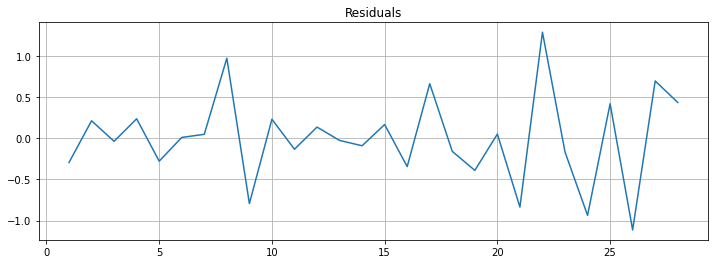

In [5]:
u = results.resid # residuals
plt.figure(figsize=(12,4))
plt.title("Residuals")
plt.plot(u)
plt.grid(True)
plt.show()

(e)

In [6]:
lag_x = x.shift(1)  # lag of x
lag_x_diff = lag_x.diff(1) # first difference of lag of x
X = pd.concat([x_diff, lag_x_diff], axis=1) # put two variables into a matrix X

X = sm.add_constant(X) # adding a constant
Y = y_diff         # y is a vector of dependent variable
X = X[2:n]    # start from 3rd observations
Y = Y[2:n]   # start from 3rd observations

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_gdp   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.6964
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.508
Time:                        23:45:07   Log-Likelihood:                -21.893
No. Observations:                  27   AIC:                             49.79
Df Residuals:                      24   BIC:                             53.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0233      0.112     -0.209      0.8

$\beta_{1}$ is 0.0685 and becomes smaller.